In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

df = pd.read_csv("synthetic_data.csv")


X = df[['feature_1', 'feature_2']].values
y_indices = df['class'].values


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

encoder = OneHotEncoder(sparse_output=False)
Y_one_hot = encoder.fit_transform(y_indices.reshape(-1, 1))

print(f"Total data points: {X_scaled.shape[0]}")

Total data points: 500


In [18]:
class NeuralNetwork:
    def __init__(self, input_neurons, hidden_neurons, output_neurons):

        self.input_neurons = input_neurons
        self.hidden_neurons = hidden_neurons
        self.output_neurons = output_neurons
        self.learning_rate = 0.1

        self.W_ih = np.random.randn(self.input_neurons, self.hidden_neurons)
        self.W_ho = np.random.randn(self.hidden_neurons, self.output_neurons)

    def sigmoid(self, x, der=False):

        if der:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def feedForward(self, X):

        # Input to Hidden Layer
        self.z1 = np.dot(X, self.W_ih)
        self.a1 = self.sigmoid(self.z1)

        # Hidden to Output Layer
        self.z2 = np.dot(self.a1, self.W_ho)
        self.output = self.sigmoid(self.z2)

        return self.output

    def backPropagation(self, X, Y, output):

        output_error = Y - output
        output_delta = self.learning_rate * output_error * self.sigmoid(output, der=True)

        hidden_error = np.dot(output_delta, self.W_ho.T)
        hidden_delta = self.learning_rate * hidden_error * self.sigmoid(self.a1, der=True)


        self.W_ho += np.dot(self.a1.T, output_delta)
        self.W_ih += np.dot(X.T, hidden_delta)


    def train(self, X, Y, epochs=50):

        errors = []
        for i in range(epochs):
            output = self.feedForward(X)
            self.backPropagation(X, Y, output)

            loss = np.mean(np.square(Y - output))
            errors.append(loss)


            print(f"Epoch {i+1}/{epochs}: Loss={loss:.6f}")

        final_loss = np.mean(np.square(Y - self.feedForward(X)))
        print(f"Final Loss on Training Data: {final_loss:.6f}")
        return errors

    def predict(self, X):

        output = self.feedForward(X)

        return np.argmax(output, axis=1)


Training data points: 400
Testing data points: 100

--- Training Started (15 Epochs on 80% of data) ---
Epoch 1/15: Loss=0.253946
Epoch 2/15: Loss=0.268207
Epoch 3/15: Loss=0.166554
Epoch 4/15: Loss=0.191370
Epoch 5/15: Loss=0.158038
Epoch 6/15: Loss=0.200902
Epoch 7/15: Loss=0.095807
Epoch 8/15: Loss=0.142974
Epoch 9/15: Loss=0.049123
Epoch 10/15: Loss=0.028278
Epoch 11/15: Loss=0.012669
Epoch 12/15: Loss=0.002148
Epoch 13/15: Loss=0.001892
Epoch 14/15: Loss=0.001751
Epoch 15/15: Loss=0.001651
Final Loss on Training Data: 0.001572
--- Training Finished ---

--- Model Evaluation ---
Training Accuracy (on 80% of data): 100.00%
Testing Accuracy (on 20% unseen data): 100.00%

Saved final_train_test_learning_curve.png


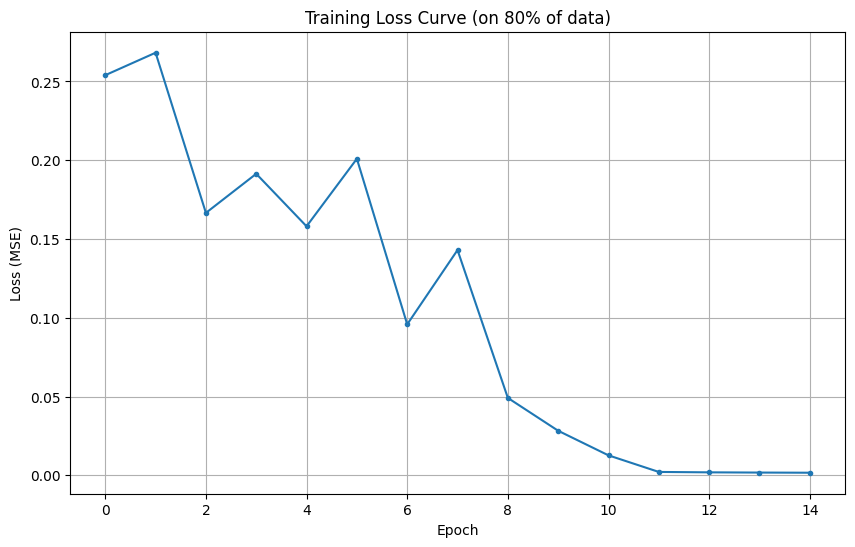

In [19]:

X_train, X_test, Y_train_one_hot, Y_test_one_hot, y_train_indices, y_test_indices = train_test_split(
    X_scaled,
    Y_one_hot,
    y_indices,
    test_size=0.2,
    random_state=42
)

print(f"Training data points: {X_train.shape[0]}")
print(f"Testing data points: {X_test.shape[0]}")


INPUT_NEURONS = X_train.shape[1]
HIDDEN_NEURONS = 10
OUTPUT_NEURONS = Y_train_one_hot.shape[1]
EPOCHS = 15


nn_split = NeuralNetwork(input_neurons=INPUT_NEURONS,
                         hidden_neurons=HIDDEN_NEURONS,
                         output_neurons=OUTPUT_NEURONS)

print(f"\n--- Training Started ({EPOCHS} Epochs on 80% of data) ---")

losses = nn_split.train(X_train, Y_train_one_hot, epochs=EPOCHS)
print("--- Training Finished ---")


print("\n--- Model Evaluation ---")


train_predictions = nn_split.predict(X_train)
train_accuracy = accuracy_score(y_train_indices, train_predictions)
print(f"Training Accuracy (on 80% of data): {train_accuracy * 100:.2f}%")


test_predictions = nn_split.predict(X_test)
test_accuracy = accuracy_score(y_test_indices, test_predictions)
print(f"Testing Accuracy (on 20% unseen data): {test_accuracy * 100:.2f}%")

plt.figure(figsize=(10, 6))
plt.plot(losses, marker='.')
plt.title(f"Training Loss Curve (on 80% of data)")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.grid(True)
plt.savefig("final_train_test_learning_curve.png")
print("\nSaved final_train_test_learning_curve.png")

In [24]:
print(nn_split.feedForward([3.99330595198557,0.891621680326337]))

[0.03546644 0.99740243 0.00305486]


In [23]:
print(nn_split.feedForward([-5.730,-7.5832]))

[0.00117331 0.01241008 0.99813013]


In [22]:
print(nn_split.feedForward([5.69,0.214]))

[0.00784739 0.9987635  0.00762179]


In [26]:
print(nn_split.feedForward([-0.376164248396483,7.06219832867581]))

[0.99987882 0.00564076 0.00738723]
